In [1]:
pwd

'/Users/zeanakaynat/Deep Learning /Gentrification using Neural Network'

In [2]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#import geopandas as gpd
#from pyproj import Proj, transform
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linreg
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
import ast
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso, Ridge
from scipy import stats
from bokeh.layouts import column, row, widgetbox
from bokeh.models import CustomJS, Slider, Toggle
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, LogTicker, ColorBar
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import push_notebook, output_notebook
from ipywidgets import *
import ipywidgets as widgets
#from shapely.geometry import Point, Polygon,MultiPoint, MultiPolygon
from functools import wraps
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# def yelp_zipcode_data(which_business,zip_code,start_date,end_date):
#     if zip_code == 11211:
#         yelp_data = pd.read_csv('csv/EDA/yelp_williamsburg_one_hot_cumsum.csv', index_col = 0)
#     elif zip_code == 11221:
#         yelp_data = pd.read_csv('csv/EDA/yelp_bushwick_one_hot_cumsum.csv', index_col = 0)
#     elif zip_code == 10035:
#         yelp_data = pd.read_csv('csv/EDA/yelp_east_harlem_one_hot_cumsum.csv', index_col = 0)
#     elif zip_code == 10069:
#         yelp_data = pd.read_csv('csv/EDA/yelp_chelsea_clinton_one_hot_cumsum.csv', index_col = 0)
#     else:
#         print('Please enter from above 4 Zipcodes')
        
#     yelp_data = yelp_data.loc[yelp_data.index >= start_date]
#     yelp_data = yelp_data.loc[yelp_data.index <= end_date]
#     yelp_data.index = pd.to_datetime(yelp_data.index)
# #     print(yelp_data.head())
#     total_businesses = yelp_data.sum(axis = 1)
#     perc_change_in_buss = total_businesses.apply(lambda x: 100*(x - total_businesses.iloc[0])/total_businesses.iloc[0])
    
#     %matplotlib inline
#     plt.figure(figsize = (15,4))
#     plt.subplot(131)
#     perc_change_in_buss.plot()
#     plt.xlabel('Year')
#     plt.ylabel('Counts')
#     plt.title('Cumulative Growth in Businesses for %d' % zip_code)
#     plt.show()
    
#     if which_business == 'Cafe':
#         cafe_zipcode = yelp_data['category_coffee']
#         cafe_zipcode_per_change = cafe_zipcode.apply(lambda x: 100*(x - cafe_zipcode.iloc[0])/cafe_zipcode.iloc[0])
#         flag = 1
#     elif which_business == 'Bars':
#         flag = 2
#         if zip_code == 11221:
#             bars_zipcode = yelp_data['category_bars']
#             bars_zipcode = bars_zipcode[bars_zipcode.index >= '2012-05-01']
#             bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])
#         else:
#             bars_zipcode = yelp_data['category_bars']
#             bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])
#     elif which_business == 'both':
#         flag = 3
#         cafe_zipcode = yelp_data['category_coffee']
#         cafe_zipcode_per_change = cafe_zipcode.apply(lambda x: 100*(x - cafe_zipcode.iloc[0])/cafe_zipcode.iloc[0])
#         if zip_code == 11221:
#             bars_zipcode = yelp_data['category_bars']
#             bars_zipcode = bars_zipcode[bars_zipcode.index >= '2012-05-01']
#             bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])
#         else:
#             bars_zipcode = yelp_data['category_bars']
#             bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])

#     if flag == 3:
#         cafe_zipcode_per_change.plot()
#         bars_zipcode_per_change.plot()
#         plt.xlabel('Year')
#         plt.ylabel('Counts')
#         plt.legend(['Cafe', 'Bars'])
#         plt.title('Cumulative Growth in Cafes and Bars for %d' % zip_code)
#         plt.show()

#     elif flag == 1:
#         cafe_zipcode_per_change.plot()
#         plt.xlabel('Year')
#         plt.ylabel('Counts')
#         plt.legend(['Cafe'])
#         plt.title('cumulative Growth in Cafes for %d' % zip_code)
#         plt.show()

#     elif flag == 2:
#         bars_zipcode_per_change.plot()
#         plt.xlabel('Year')
#         plt.ylabel('Counts')
#         plt.legend(['Bars'])        
#         plt.title('cumulative Growth in Bars for %d' % zip_code)
#         plt.show()

#     else:
#         print("""Please Enter Only from "Cafe" "Bars" or "Both":""")
    
#     return yelp_data

In [5]:
def yelp_zipcode_data(which_business,zip_code,start_date,end_date):
    if zip_code == 11211:
        yelp_data = pd.read_csv('csv/EDA/yelp_williamsburg_one_hot_cumsum.csv', index_col = 0)
    elif zip_code == 11221:
        yelp_data = pd.read_csv('csv/EDA/yelp_bushwick_one_hot_cumsum.csv', index_col = 0)
    elif zip_code == 10035:
        yelp_data = pd.read_csv('csv/EDA/yelp_east_harlem_one_hot_cumsum.csv', index_col = 0)
    elif zip_code == 10069:
        yelp_data = pd.read_csv('csv/EDA/yelp_chelsea_clinton_one_hot_cumsum.csv', index_col = 0)
    else:
        print('Please enter from above 4 Zipcodes')
        
    yelp_data = yelp_data.loc[yelp_data.index >= start_date]
    yelp_data = yelp_data.loc[yelp_data.index <= end_date]
    yelp_data.index = pd.to_datetime(yelp_data.index)
#     print(yelp_data.head())
    total_businesses = yelp_data.sum(axis = 1)
    perc_change_in_buss = total_businesses.apply(lambda x: 100*(x - total_businesses.iloc[0])/total_businesses.iloc[0])
    
    %matplotlib inline
    plt.figure(figsize = (15,4))
    plt.subplot(131)
    perc_change_in_buss.plot()
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title('Cumulative Growth in Businesses for %d' % zip_code)
    plt.show()
    
    if which_business == 'Cafe':
        cafe_zipcode = yelp_data['category_coffee']
        cafe_zipcode_per_change = cafe_zipcode.apply(lambda x: 100*(x - cafe_zipcode.iloc[0])/cafe_zipcode.iloc[0])
        flag = 1
    elif which_business == 'Bars':
        flag = 2
        if zip_code == 11221:
            bars_zipcode = yelp_data['category_bars']
            bars_zipcode = bars_zipcode[bars_zipcode.index >= '2012-05-01']
            bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])
        else:
            bars_zipcode = yelp_data['category_bars']
            bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])
    elif which_business == 'both':
        flag = 3
        cafe_zipcode = yelp_data['category_coffee']
        cafe_zipcode_per_change = cafe_zipcode.apply(lambda x: 100*(x - cafe_zipcode.iloc[0])/cafe_zipcode.iloc[0])
        if zip_code == 11221:
            bars_zipcode = yelp_data['category_bars']
            bars_zipcode = bars_zipcode[bars_zipcode.index >= '2012-05-01']
            bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])
        else:
            bars_zipcode = yelp_data['category_bars']
            bars_zipcode_per_change = bars_zipcode.apply(lambda x: 100*(x - bars_zipcode.iloc[0])/bars_zipcode.iloc[0])

    if flag == 3:
        cafe_zipcode_per_change.plot()
        bars_zipcode_per_change.plot()
        plt.xlabel('Year')
        plt.ylabel('Counts')
        plt.legend(['Cafe', 'Bars'])
        plt.title('cumulative Growth in Cafes and Bars for %d' % zip_code)
        plt.show()

    elif flag == 1:
        cafe_zipcode_per_change.plot()
        plt.xlabel('Year')
        plt.ylabel('Counts')
        plt.legend(['Cafe'])
        plt.title('cumulative Growth in Cafes for %d' % zip_code)
        plt.show()

    elif flag == 2:
        bars_zipcode_per_change.plot()
        plt.xlabel('Year')
        plt.ylabel('Counts')
        plt.legend(['Bars'])        
        plt.title('cumulative Growth in Bars for %d' % zip_code)
        plt.show()

    else:
        print("""Please Enter Only from "Cafe" "Bars" or "Both":""")
    
    return yelp_data

In [6]:
def yelp_zipcode_data_only(which_business,zip_code,start_date,end_date):
    if zip_code == 11211:
        yelp_data = pd.read_csv('csv/EDA/yelp_williamsburg_one_hot_cumsum.csv', index_col = 0)
    elif zip_code == 11221:
        yelp_data = pd.read_csv('csv/EDA/yelp_bushwick_one_hot_cumsum.csv', index_col = 0)
    elif zip_code == 10035:
        yelp_data = pd.read_csv('csv/EDA/yelp_east_harlem_one_hot_cumsum.csv', index_col = 0)
    elif zip_code == 10069:
        yelp_data = pd.read_csv('csv/EDA/yelp_chelsea_clinton_one_hot_cumsum.csv', index_col = 0)
    else:
        print('Please enter from above 4 Zipcodes')
        
    yelp_data = yelp_data.loc[yelp_data.index >= start_date]
    yelp_data = yelp_data.loc[yelp_data.index <= end_date]
    yelp_data.index = pd.to_datetime(yelp_data.index)

    return yelp_data

In [7]:
def yelp_plots(start_date,end_date):
    
    yelp_williamsburg_one_hot_cumsum = pd.read_csv('csv/EDA/yelp_williamsburg_one_hot_cumsum.csv', index_col = 0)
    yelp_bushwick_one_hot_cumsum = pd.read_csv('csv/EDA/yelp_bushwick_one_hot_cumsum.csv', index_col = 0)
    yelp_east_harlem_one_hot_cumsum = pd.read_csv('csv/EDA/yelp_east_harlem_one_hot_cumsum.csv', index_col = 0)
    yelp_chelsea_clinton_one_hot_cumsum = pd.read_csv('csv/EDA/yelp_chelsea_clinton_one_hot_cumsum.csv', index_col = 0)

    #date filters
    yelp_williamsburg_one_hot_cumsum = yelp_williamsburg_one_hot_cumsum.loc[yelp_williamsburg_one_hot_cumsum.index >= start_date]
    yelp_williamsburg_one_hot_cumsum = yelp_williamsburg_one_hot_cumsum.loc[yelp_williamsburg_one_hot_cumsum.index <= end_date]
    yelp_williamsburg_one_hot_cumsum.index = pd.to_datetime(yelp_williamsburg_one_hot_cumsum.index)
    
    yelp_bushwick_one_hot_cumsum = yelp_bushwick_one_hot_cumsum.loc[yelp_bushwick_one_hot_cumsum.index >= start_date]
    yelp_bushwick_one_hot_cumsum = yelp_bushwick_one_hot_cumsum.loc[yelp_bushwick_one_hot_cumsum.index <= end_date]
    yelp_bushwick_one_hot_cumsum.index = pd.to_datetime(yelp_bushwick_one_hot_cumsum.index)
    
    yelp_east_harlem_one_hot_cumsum = yelp_east_harlem_one_hot_cumsum.loc[yelp_east_harlem_one_hot_cumsum.index >= start_date]
    yelp_east_harlem_one_hot_cumsum = yelp_east_harlem_one_hot_cumsum.loc[yelp_east_harlem_one_hot_cumsum.index <= end_date]
    yelp_east_harlem_one_hot_cumsum.index = pd.to_datetime(yelp_east_harlem_one_hot_cumsum.index)
    
    yelp_chelsea_clinton_one_hot_cumsum = yelp_chelsea_clinton_one_hot_cumsum.loc[yelp_chelsea_clinton_one_hot_cumsum.index >= start_date]
    yelp_chelsea_clinton_one_hot_cumsum = yelp_chelsea_clinton_one_hot_cumsum.loc[yelp_chelsea_clinton_one_hot_cumsum.index <= end_date]
    yelp_chelsea_clinton_one_hot_cumsum.index = pd.to_datetime(yelp_chelsea_clinton_one_hot_cumsum.index)
    
    yelp_williamsburg_one_hot_cumsum_all_buss = yelp_williamsburg_one_hot_cumsum.sum(axis = 1)
    yelp_bushwick_one_hot_cumsum_all_buss = yelp_bushwick_one_hot_cumsum.sum(axis = 1)
    yelp_east_harlem_one_hot_cumsum_all_buss = yelp_east_harlem_one_hot_cumsum.sum(axis = 1)
    yelp_chelsea_clinton_one_hot_cumsum_all_buss = yelp_chelsea_clinton_one_hot_cumsum.sum(axis = 1)
    yelp_williamsburg_all_buss_perc_change = yelp_williamsburg_one_hot_cumsum_all_buss.apply(lambda x: 100*(x - yelp_williamsburg_one_hot_cumsum_all_buss.iloc[0])/yelp_williamsburg_one_hot_cumsum_all_buss.iloc[0])
    yelp_bushwick_all_buss_perc_change = yelp_bushwick_one_hot_cumsum_all_buss.apply(lambda x: 100*(x - yelp_bushwick_one_hot_cumsum_all_buss.iloc[0])/yelp_bushwick_one_hot_cumsum_all_buss.iloc[0])
    yelp_east_harlem_all_buss_perc_change = yelp_east_harlem_one_hot_cumsum_all_buss.apply(lambda x: 100*(x - yelp_east_harlem_one_hot_cumsum_all_buss.iloc[0])/yelp_east_harlem_one_hot_cumsum_all_buss.iloc[0])
    yelp_chelsea_clinton_all_buss_perc_change = yelp_chelsea_clinton_one_hot_cumsum_all_buss.apply(lambda x: 100*(x - yelp_chelsea_clinton_one_hot_cumsum_all_buss.iloc[0])/yelp_chelsea_clinton_one_hot_cumsum_all_buss.iloc[0])

    # cafe
    # williamsburg
    cafe_williamsburg = yelp_williamsburg_one_hot_cumsum['category_coffee']
    # bushwick
    cafe_bushwick = yelp_bushwick_one_hot_cumsum['category_coffee']
    #east harlem 
    cafe_east_harlem = yelp_east_harlem_one_hot_cumsum['category_coffee']
    #chelsea clinton 
    cafe_chelsea_clinton = yelp_chelsea_clinton_one_hot_cumsum['category_coffee']

    # bars
    # williamsburg
    bars_williamsburg = yelp_williamsburg_one_hot_cumsum['category_bars']
    # bushwick
    bars_bushwick = yelp_bushwick_one_hot_cumsum['category_bars']
    bars_bushwick = bars_bushwick[bars_bushwick.index >= '2012-05-01']
    #east harlem 
    bars_east_harlem = yelp_east_harlem_one_hot_cumsum['category_bars']
    #chelsea clinton
    bars_chelsea_clinton = yelp_chelsea_clinton_one_hot_cumsum['category_bars']

    #cafes
    yelp_williamsburg_cafe_perc_change = cafe_williamsburg.apply(lambda x: 100*(x - cafe_williamsburg.iloc[0])/cafe_williamsburg.iloc[0])
    yelp_bushwick_cafe_perc_change = cafe_bushwick.apply(lambda x: 100*(x - cafe_bushwick.iloc[0])/cafe_bushwick.iloc[0])
    yelp_east_harlem_cafe_perc_change = cafe_east_harlem.apply(lambda x: 100*(x - cafe_east_harlem.iloc[0])/cafe_east_harlem.iloc[0])
    yelp_chelsea_clinton_cafe_perc_change = cafe_chelsea_clinton.apply(lambda x: 100*(x - cafe_chelsea_clinton.iloc[0])/cafe_chelsea_clinton.iloc[0])
    #bars
    yelp_williamsburg_bars_perc_change = bars_williamsburg.apply(lambda x: 100*(x - bars_williamsburg.iloc[0])/bars_williamsburg.iloc[0])
    yelp_bushwick_bars_perc_change = bars_bushwick.apply(lambda x: 100*(x - bars_bushwick.iloc[0])/bars_bushwick.iloc[0])
    yelp_east_harlem_bars_perc_change = bars_east_harlem.apply(lambda x: 100*(x - bars_east_harlem.iloc[0])/bars_east_harlem.iloc[0])
    yelp_chelsea_clinton_bars_perc_change = bars_chelsea_clinton.apply(lambda x: 100*(x - bars_chelsea_clinton.iloc[0])/bars_chelsea_clinton.iloc[0])
    
    %matplotlib inline
    plt.figure(figsize = (15,4))
    plt.subplot(131)
    yelp_williamsburg_all_buss_perc_change.plot()
    yelp_bushwick_all_buss_perc_change.plot()
    yelp_east_harlem_all_buss_perc_change.plot()
    yelp_chelsea_clinton_all_buss_perc_change.plot()
    plt.legend(['Williamsburg', 'Bushwick', "East Harlem", "Chelsea & Clinton"])
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title('Cumulative Growth in Businesses')

    plt.subplot(132)
    yelp_williamsburg_cafe_perc_change.plot()
    yelp_bushwick_cafe_perc_change.plot()
    yelp_east_harlem_cafe_perc_change.plot()
    yelp_chelsea_clinton_cafe_perc_change.plot()
    plt.legend(['Williamsburg', 'Bushwick', "East Harlem", "Chelsea & Clinton "])
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title('cumulative growth in cafes')

    plt.subplot(133)
    yelp_williamsburg_bars_perc_change.plot()
    yelp_bushwick_bars_perc_change.plot()
    yelp_east_harlem_bars_perc_change.plot()
    yelp_chelsea_clinton_bars_perc_change.plot()
    plt.legend(['Williamsburg', 'Bushwick', "East Harlem", "Chelsea % Clinton"])
    plt.title('cumulative growth in bars')
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.show()

In [8]:
def fast_rent_growth_zipcode(new_zip_code,start_date,end_date):
    %matplotlib inline    
    if new_zip_code == 11211:
        yelp_williamsburg_one_hot_cumsum_top10 = pd.read_csv('csv/linear_regression/yelp_williamsburg_one_hot_cumsum_top10.csv', index_col = 0)

        yelp_williamsburg_one_hot_cumsum_top10 = yelp_williamsburg_one_hot_cumsum_top10.loc[yelp_williamsburg_one_hot_cumsum_top10.index >= start_date]
        yelp_williamsburg_one_hot_cumsum_top10 = yelp_williamsburg_one_hot_cumsum_top10.loc[yelp_williamsburg_one_hot_cumsum_top10.index <= end_date]

        yelp_williamsburg_one_hot_cumsum_top10.index = pd.to_datetime(yelp_williamsburg_one_hot_cumsum_top10.index)

        yelp_williamsburg_one_hot_cumsum_top10.plot()
        plt.legend(yelp_williamsburg_one_hot_cumsum_top10.columns)
        plt.title('Growth of Top 10 Business Categories - Williamsburg')
        plt.xlabel('Time')
        plt.ylabel('Counts')
        plt.show()    

    elif new_zip_code == 11221:
        yelp_bushwick_one_hot_cumsum_top10 = pd.read_csv('csv/linear_regression/yelp_bushwick_one_hot_cumsum_top10.csv', index_col = 0)

        yelp_bushwick_one_hot_cumsum_top10 = yelp_bushwick_one_hot_cumsum_top10.loc[yelp_bushwick_one_hot_cumsum_top10.index >= start_date]
        yelp_bushwick_one_hot_cumsum_top10 = yelp_bushwick_one_hot_cumsum_top10.loc[yelp_bushwick_one_hot_cumsum_top10.index <= end_date]

        yelp_bushwick_one_hot_cumsum_top10.index = pd.to_datetime(yelp_bushwick_one_hot_cumsum_top10.index)


        plt.plot(yelp_bushwick_one_hot_cumsum_top10)
        plt.title('Growth of Top 5 Business Categories - Bushwick')
        plt.xlabel('Time')
        plt.ylabel('Counts')
        plt.legend(yelp_bushwick_one_hot_cumsum_top10.columns)
        plt.show()
    else:
        print('Please enter from above 2 Zipcodes')

In [9]:
def transpose_df(zip_code,ny_rent_studio):
    ny_rent_studio_T = ny_rent_studio.loc[ny_rent_studio['Zipcode'] == zip_code]
    ny_rent_studio_T = ny_rent_studio_T.drop(['Zipcode','Borough','tot_percent_increase'], axis = 1)
#     ny_rent_studio_T = ny_rent_studio_T.drop(['Zipcode','Borough'], axis = 1)
    ny_rent_studio_T.index.names = ['Year']
    ny_rent_studio_T = ny_rent_studio_T.T
    ny_rent_studio_T.columns = ['Rent']
    ny_rent_studio_T.index = pd.to_datetime(ny_rent_studio_T.index)
#     print(type(ny_rent_studio_T))
#     print(ny_rent_studio_T.head())
#     ny_rent_studio_T = ny_rent_studio_T.sum(axis = 1)
#     ny_rent_studio_T = ny_rent_studio_T.apply(lambda x: 100*(x - ny_rent_studio_T.iloc[0])/ny_rent_studio_T.iloc[0])
#     ny_rent_studio_T = ny_rent_studio_T.to_frame().reset_index()
#     ny_rent_studio_T.index = ny_rent_studio_T['Date']
    ny_rent_studio_T.index.name = 'Date'
    return ny_rent_studio_T
#     print(type(ny_rent_studio_T))
#     print(ny_rent_studio_T.head())

In [10]:
# def rent_yelp_merge(ny_rent_studio_T,yelp_data):
#     merged_rent_yelp = ny_rent_studio_T.merge(yelp_data, how='left', left_index=True, right_index=True)
# #     print(merged_rent_yelp.head())
#     return merged_rent_yelp

In [11]:
#     merged_rent_yelp['tot_percent_increase'] = merged_rent_yelp['Rent'].apply(lambda x: 100*(x - merged_rent_yelp.iloc[0])/merged_rent_yelp.iloc[0])
#     merged_rent_yelp["per_increase_rent_month_later"] = merged_rent_yelp['tot_percent_increase'].shift(1)
#     merged_rent_yelp["per_increase_rent_2_month_later"] = merged_rent_yelp['tot_percent_increase'].shift(2)

In [12]:
# def pearson_correlation(merged_rent_yelp):
#     merged_rent_yelp['tot_percent_increase'] = merged_rent_yelp['Rent'] #.apply(lambda x: 100*(x - merged_rent_yelp.iloc[0])/merged_rent_yelp.iloc[0])
# #     print(merged_rent_yelp)
# #     merged_rent_yelp["per_increase_rent_month_later"] = merged_rent_yelp['tot_percent_increase'].shift(1)
# #     merged_rent_yelp["per_increase_rent_2_month_later"] = merged_rent_yelp['tot_percent_increase'].shift(2)

In [13]:
def pearson_correlation_2(new_zip_code,start_date,end_date):
    
    if new_zip_code == 11211:
        # Williamsburg
        yelp_williamsburg_one_hot_cumsum_top10 = pd.read_csv('csv/linear_regression/yelp_williamsburg_one_hot_cumsum_top10.csv', index_col = 0)
       
        yelp_williamsburg_one_hot_cumsum_top10.index = pd.to_datetime(yelp_williamsburg_one_hot_cumsum_top10.index)

        yelp_williamsburg_one_hot_cumsum_top10 = yelp_williamsburg_one_hot_cumsum_top10.loc[yelp_williamsburg_one_hot_cumsum_top10.index >= start_date]
        yelp_williamsburg_one_hot_cumsum_top10 = yelp_williamsburg_one_hot_cumsum_top10.loc[yelp_williamsburg_one_hot_cumsum_top10.index <= end_date]

        yelp_williamsburg_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_williamsburg.csv', index_col = ['Unnamed: 0'])
        yelp_williamsburg_cumsum_perc_inc_df.index = pd.to_datetime(yelp_williamsburg_cumsum_perc_inc_df.index)
                                                        #CHECKTHIS^
        yelp_williamsburg_cumsum_perc_inc_df = yelp_williamsburg_cumsum_perc_inc_df.loc[yelp_williamsburg_cumsum_perc_inc_df.index >= start_date]
        yelp_williamsburg_cumsum_perc_inc_df = yelp_williamsburg_cumsum_perc_inc_df.loc[yelp_williamsburg_cumsum_perc_inc_df.index <= end_date]

        yelp_williamsburg_cumsum_perc_inc_df["%increase_rent_month_later"] = yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'].shift(1)
        yelp_williamsburg_cumsum_perc_inc_df["%increase_rent_2_month_later"] = yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'].shift(2)

        # pearson's corr for percent increase in each business vs. percent increase in rent
        pearsons_corr_perc_inc  = yelp_williamsburg_cumsum_perc_inc_df.corr()
        corr_to_rent_perc_inc = pearsons_corr_perc_inc['%increase_rent']
        corr_to_rent_perc_inc = corr_to_rent_perc_inc.dropna()
        corr_to_rent_perc_inc = corr_to_rent_perc_inc.to_frame().transpose()
        corr_to_rent_perc_inc = corr_to_rent_perc_inc.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_month = pearsons_corr_perc_inc["%increase_rent_month_later"]
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.dropna()
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.to_frame().transpose()
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_2_month = pearsons_corr_perc_inc["%increase_rent_2_month_later"]
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.dropna()
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.to_frame().transpose()
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.loc[:, :'category_wine_bars']

        corr_to_rent_perc_inc = corr_to_rent_perc_inc[list(yelp_williamsburg_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month[list(yelp_williamsburg_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month[list(yelp_williamsburg_one_hot_cumsum_top10.columns)]

        %matplotlib inline
        f, ax = plt.subplots(figsize=(10, 2))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        sns.heatmap(corr_to_rent_perc_inc,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent')
        plt.xticks(np.arange(corr_to_rent_perc_inc.shape[1])[:10], corr_to_rent_perc_inc.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(10, 2))
    #     labels = [''.join(wrap(corr_to_rent_perc_inc_2_month.index[0], 5))]
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        sns.heatmap(corr_to_rent_perc_inc_month,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent a month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc.shape[1])[:10], corr_to_rent_perc_inc_month.columns, rotation = 40, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(10, 2))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        sns.heatmap(corr_to_rent_perc_inc_2_month,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent two month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc.shape[1])[:10], corr_to_rent_perc_inc_2_month.columns, rotation = 40, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()
        
        
    elif new_zip_code == 11221:
#         Bushwick
        yelp_bushwick_one_hot_cumsum_top10 = pd.read_csv('csv/linear_regression/yelp_bushwick_one_hot_cumsum_top10.csv', index_col = 0)
        yelp_bushwick_one_hot_cumsum_top10.index = pd.to_datetime(yelp_bushwick_one_hot_cumsum_top10.index)
    
        yelp_bushwick_one_hot_cumsum_top10 = yelp_bushwick_one_hot_cumsum_top10.loc[yelp_bushwick_one_hot_cumsum_top10.index >= start_date]
        yelp_bushwick_one_hot_cumsum_top10 = yelp_bushwick_one_hot_cumsum_top10.loc[yelp_bushwick_one_hot_cumsum_top10.index <= end_date] 

        yelp_bushwick_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_bushwick.csv', index_col = ['Unnamed: 0'])
                                                        #CHECK THIS        
        yelp_bushwick_cumsum_perc_inc_df.index = pd.to_datetime(yelp_bushwick_cumsum_perc_inc_df.index)

        yelp_bushwick_cumsum_perc_inc_df = yelp_bushwick_cumsum_perc_inc_df.loc[yelp_bushwick_cumsum_perc_inc_df.index >= start_date]
        yelp_bushwick_cumsum_perc_inc_df = yelp_bushwick_cumsum_perc_inc_df.loc[yelp_bushwick_cumsum_perc_inc_df.index <= end_date] 
        
        yelp_bushwick_cumsum_perc_inc_df=yelp_bushwick_cumsum_perc_inc_df.rename(columns = {'rent':'%increase_rent'})
        yelp_bushwick_cumsum_perc_inc_df["%increase_rent_month_later"] = yelp_bushwick_cumsum_perc_inc_df['%increase_rent'].shift(1)
        yelp_bushwick_cumsum_perc_inc_df["%increase_rent_2_month_later"] = yelp_bushwick_cumsum_perc_inc_df['%increase_rent'].shift(2)

        # pearson's corr for percent increase in each business vs. percent increase in rent
        pearsons_corr_perc_inc_bushwick  = yelp_bushwick_cumsum_perc_inc_df.corr()
        corr_to_rent_perc_inc_bushwick = pearsons_corr_perc_inc_bushwick['%increase_rent']
        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick.dropna()
        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick.to_frame().transpose()
        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_month_bushwick = pearsons_corr_perc_inc_bushwick["%increase_rent_month_later"]
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick.dropna()
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick.to_frame().transpose()
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_2_month_bushwick = pearsons_corr_perc_inc_bushwick["%increase_rent_2_month_later"]
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick.dropna()
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick.to_frame().transpose()
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick.loc[:, :'category_wine_bars']

        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick[list(yelp_bushwick_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick[list(yelp_bushwick_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick[list(yelp_bushwick_one_hot_cumsum_top10.columns)]

        %matplotlib inline
        f, ax = plt.subplots(figsize=(4, 3))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        cbar_ax = f.add_axes([.905, .4, .05, .2])
        sns.heatmap(corr_to_rent_perc_inc_bushwick,cbar_ax = cbar_ax, cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent')
        plt.xticks(np.arange(corr_to_rent_perc_inc_bushwick.shape[1])[:10], corr_to_rent_perc_inc_bushwick.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(4, 3))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        cbar_ax = f.add_axes([.905, .4, .05, .2])
        sns.heatmap(corr_to_rent_perc_inc_month_bushwick,cmap=cmap,vmax=.3, cbar_ax = cbar_ax, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent a month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc_month_bushwick.shape[1])[:10], corr_to_rent_perc_inc_month_bushwick.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(4, 3))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        cbar_ax = f.add_axes([.905, .4, .05, .2])
        sns.heatmap(corr_to_rent_perc_inc_2_month_bushwick,cmap=cmap,vmax=.3, cbar_ax = cbar_ax, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent two month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc_2_month_bushwick.shape[1])[:10], corr_to_rent_perc_inc_2_month_bushwick.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

### Pearson Correlation

In [14]:
def pearson_correlation(new_zip_code):
    
    if new_zip_code == 11211:
        # Williamsburg
        yelp_williamsburg_one_hot_cumsum_top10 = pd.read_csv('csv/linear_regression/yelp_williamsburg_one_hot_cumsum_top10.csv', index_col = 0)
        yelp_williamsburg_one_hot_cumsum_top10.index = pd.to_datetime(yelp_williamsburg_one_hot_cumsum_top10.index)
        yelp_williamsburg_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_williamsburg.csv', index_col = ['Unnamed: 0'])
                                                                #CHECKTHIS
        yelp_williamsburg_cumsum_perc_inc_df.index = pd.to_datetime(yelp_williamsburg_cumsum_perc_inc_df.index)
        
        yelp_williamsburg_cumsum_perc_inc_df["%increase_rent_month_later"] = yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'].shift(1)
        yelp_williamsburg_cumsum_perc_inc_df["%increase_rent_2_month_later"] = yelp_williamsburg_cumsum_perc_inc_df['%increase_rent'].shift(2)

        # pearson's corr for percent increase in each business vs. percent increase in rent
        pearsons_corr_perc_inc  = yelp_williamsburg_cumsum_perc_inc_df.corr()
        corr_to_rent_perc_inc = pearsons_corr_perc_inc['%increase_rent']
        corr_to_rent_perc_inc = corr_to_rent_perc_inc.dropna()
        corr_to_rent_perc_inc = corr_to_rent_perc_inc.to_frame().transpose()
        corr_to_rent_perc_inc = corr_to_rent_perc_inc.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_month = pearsons_corr_perc_inc["%increase_rent_month_later"]
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.dropna()
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.to_frame().transpose()
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_2_month = pearsons_corr_perc_inc["%increase_rent_2_month_later"]
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.dropna()
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.to_frame().transpose()
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month.loc[:, :'category_wine_bars']

        corr_to_rent_perc_inc = corr_to_rent_perc_inc[list(yelp_williamsburg_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_month = corr_to_rent_perc_inc_month[list(yelp_williamsburg_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_2_month = corr_to_rent_perc_inc_2_month[list(yelp_williamsburg_one_hot_cumsum_top10.columns)]

        %matplotlib inline
        f, ax = plt.subplots(figsize=(10, 2))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        sns.heatmap(corr_to_rent_perc_inc,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent')
        plt.xticks(np.arange(corr_to_rent_perc_inc.shape[1])[:10], corr_to_rent_perc_inc.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(10, 2))
    #     labels = [''.join(wrap(corr_to_rent_perc_inc_2_month.index[0], 5))]
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        sns.heatmap(corr_to_rent_perc_inc_month,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent a month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc.shape[1])[:10], corr_to_rent_perc_inc_month.columns, rotation = 40, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(10, 2))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        sns.heatmap(corr_to_rent_perc_inc_2_month,cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent two month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc.shape[1])[:10], corr_to_rent_perc_inc_2_month.columns, rotation = 40, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()
        
        
    elif new_zip_code == 11221:
#         Bushwick
        yelp_bushwick_one_hot_cumsum_top10 = pd.read_csv('csv/linear_regression/yelp_bushwick_one_hot_cumsum_top10.csv', index_col = 0)
        yelp_bushwick_one_hot_cumsum_top10.index = pd.to_datetime(yelp_bushwick_one_hot_cumsum_top10.index)
        yelp_bushwick_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_bushwick.csv', index_col = ['Unnamed: 0'])
                                                            # CHECKTHIS       
        yelp_bushwick_cumsum_perc_inc_df.index = pd.to_datetime(yelp_bushwick_cumsum_perc_inc_df.index)
        
        yelp_bushwick_cumsum_perc_inc_df=yelp_bushwick_cumsum_perc_inc_df.rename(columns = {'rent':'%increase_rent'})
        yelp_bushwick_cumsum_perc_inc_df["%increase_rent_month_later"] = yelp_bushwick_cumsum_perc_inc_df['%increase_rent'].shift(1)
        yelp_bushwick_cumsum_perc_inc_df["%increase_rent_2_month_later"] = yelp_bushwick_cumsum_perc_inc_df['%increase_rent'].shift(2)

        # pearson's corr for percent increase in each business vs. percent increase in rent
        pearsons_corr_perc_inc_bushwick  = yelp_bushwick_cumsum_perc_inc_df.corr()
        corr_to_rent_perc_inc_bushwick = pearsons_corr_perc_inc_bushwick['%increase_rent']
        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick.dropna()
        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick.to_frame().transpose()
        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_month_bushwick = pearsons_corr_perc_inc_bushwick["%increase_rent_month_later"]
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick.dropna()
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick.to_frame().transpose()
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick.loc[:, :'category_wine_bars']

        # pearson's corr for percent increase in each business vs. percent increase in rent a month later
        corr_to_rent_perc_inc_2_month_bushwick = pearsons_corr_perc_inc_bushwick["%increase_rent_2_month_later"]
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick.dropna()
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick.to_frame().transpose()
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick.loc[:, :'category_wine_bars']

        corr_to_rent_perc_inc_bushwick = corr_to_rent_perc_inc_bushwick[list(yelp_bushwick_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_month_bushwick = corr_to_rent_perc_inc_month_bushwick[list(yelp_bushwick_one_hot_cumsum_top10.columns)]
        corr_to_rent_perc_inc_2_month_bushwick = corr_to_rent_perc_inc_2_month_bushwick[list(yelp_bushwick_one_hot_cumsum_top10.columns)]

        %matplotlib inline
        f, ax = plt.subplots(figsize=(4, 3))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        cbar_ax = f.add_axes([.905, .4, .05, .2])
        sns.heatmap(corr_to_rent_perc_inc_bushwick,cbar_ax = cbar_ax, cmap=cmap,vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent')
        plt.xticks(np.arange(corr_to_rent_perc_inc_bushwick.shape[1])[:10], corr_to_rent_perc_inc_bushwick.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(4, 3))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        cbar_ax = f.add_axes([.905, .4, .05, .2])
        sns.heatmap(corr_to_rent_perc_inc_month_bushwick,cmap=cmap,vmax=.3, cbar_ax = cbar_ax, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent a month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc_month_bushwick.shape[1])[:10], corr_to_rent_perc_inc_month_bushwick.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

        f, ax = plt.subplots(figsize=(4, 3))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        ax = plt.axes()
        cbar_ax = f.add_axes([.905, .4, .05, .2])
        sns.heatmap(corr_to_rent_perc_inc_2_month_bushwick,cmap=cmap,vmax=.3, cbar_ax = cbar_ax, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)
        ax.set_title('correlation bet. % increase in business and % increase in rent two month later')
        plt.xticks(np.arange(corr_to_rent_perc_inc_2_month_bushwick.shape[1])[:10], corr_to_rent_perc_inc_2_month_bushwick.columns, rotation = 30, ha = 'center')
        plt.yticks(rotation = 0)
        plt.show()

In [15]:
def rent_trend_analysis(ny_rent_studio_T):

    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(ny_rent_studio_T)

    # Gather the trend, seasonality and noise of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    # rcParams['figure.figsize'] = 15, 15
    plt.subplot(411)
    plt.plot(ny_rent_studio_T, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

In [16]:
def LSTM(ny_rent_studio_T):
    # Entire code block for LSTTM
    plot_df = ny_rent_studio_T
    plot_df = plot_df.reset_index(drop=True)
    plot_df['Date'] = plot_df.index
    cols = plot_df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    plot_df = plot_df[cols]
    plot_df = plot_df.reset_index(drop=True)
    
    #importing required libraries
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, LSTM

    #creating dataframe
    data = plot_df.sort_index(ascending=True, axis=0) #dateframe here
    new_data = pd.DataFrame(index=range(0,len(plot_df)),columns=['Date', 'Rent'])

    # print(len(data))

    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Rent'][i] = data['Rent'][i]

    #setting index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    # print(type(new_data))

    new_data.isnull().values.any()

    new_data = new_data.dropna()

    # print('We have a total of %s rows' % len(new_data))

    #creating train and test sets
    dataset = new_data.values
    train_len = int(len(plot_df)*.90)
    train = dataset[0:train_len,:]
    valid = dataset[train_len:,:]

    # print(np.isnan(dataset.any()))
    # print(np.isfinite(dataset.all()))

    # print(type(dataset))
    # dataset

    dataset.dtype

    # dataset = dataset[~np.isnan(dataset)]

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    lookback_period = len(plot_df)-train_len
    x_train, y_train = [], []
    for i in range(lookback_period,len(train)):
        x_train.append(scaled_data[i-lookback_period:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=lookback_period, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=lookback_period))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=2)

    #predicting 319 values, using past 10 from the train data
    inputs = new_data[len(new_data) - len(valid) - lookback_period:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(lookback_period,inputs.shape[0]):
        X_test.append(inputs[i-lookback_period:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    rms=np.sqrt(np.mean(np.power((valid-predicted_price),2)))
    print('RMSE value = ' + str(rms))

    #for plotting
    train=new_data.iloc[0:train_len,]
    valid = new_data.iloc[train_len:,:]
    valid['Predictions'] = predicted_price
#     plt.figure(figsize=(15,4))
    fig = plt.figure(figsize=(10,4))
    import pylab
    plt.plot(train['Rent'], '-g', label='Train')
    # pylab.plot(x, alpha, '-b', label='Train')

    plt.plot(valid['Rent'], '-r', label='Test')
    plt.plot(valid['Predictions'], '-o', label='Predictions')

    # pylab.plot(x, Predictions, '-g', label='Predictions')
    # pylab.plot(x, alpha, '-o', label='Actual')

    fig.suptitle('Rent Prediction', fontsize=20)
    plt.xlabel('Year-Month', fontsize=18)
    plt.ylabel('Rent', fontsize=16)

    pylab.legend(loc='lower right') 

#     plt.plot(train['Rent'])
#     plt.plot(valid[['Rent','Predictions']])

Please Enter Zip Code from the following- 
 1: 11211 for Williamsburg 
 2: 11221 for bushwick 
 My Zipcode: 11211
Please Enter Start Date as YYYY-MM m: 2012-04
Please Enter End Date as YYYY-MM: 2016-03

 Average rent increase in entire NYC from 2012-04 to 2016-03 is 0.203419

 Percentage Neighbourhood with greater than mean rent increase is 40.0%

 Percentage Neighbourhood with less than mean rent increase is 60.0%

 Rent Increase of given Neighbourhood is 3.8%


interactive(children=(Dropdown(description='select', layout=Layout(width='450px'), options=('Zipcodes with the…

Choose from 'Cafe' or 'Bars' or 'both': Cafe


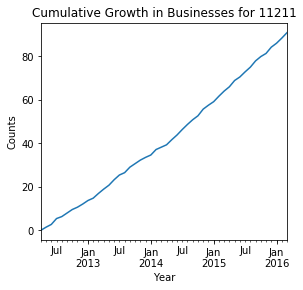

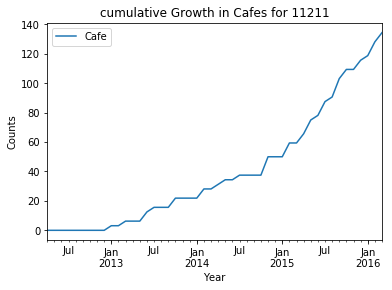

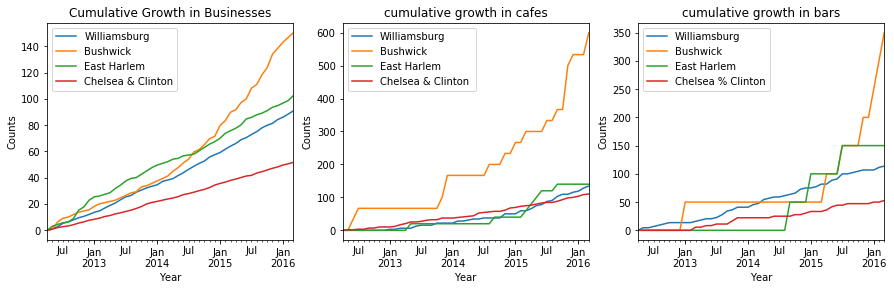

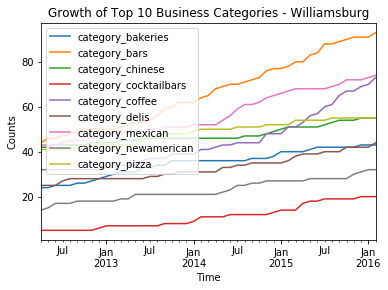

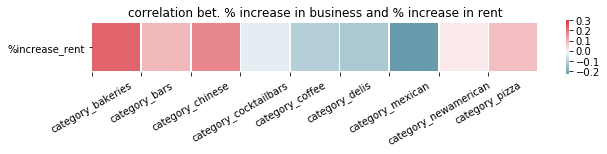

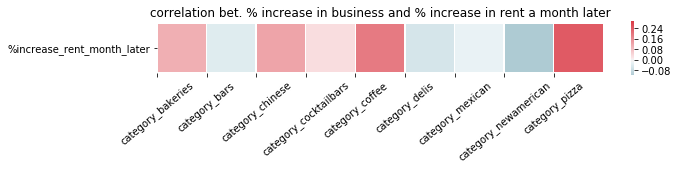

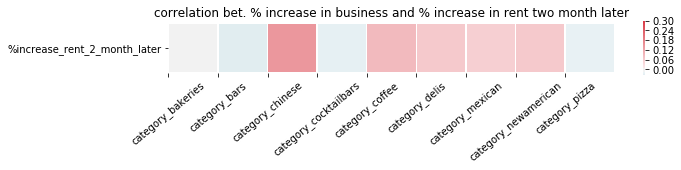

Using TensorFlow backend.


Epoch 1/3
 - 2s - loss: 0.2737
Epoch 2/3
 - 0s - loss: 0.1089
Epoch 3/3
 - 0s - loss: 0.0384
RMSE value = 106.82199355514095


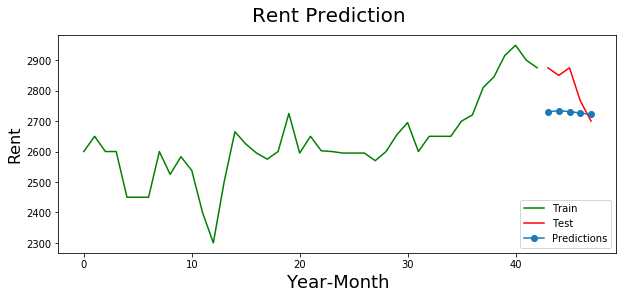

In [18]:
# SUPER FUNCTION 1
def get_me_everything():
    zip_code = int(input('Please Enter Zip Code from the following- \n 1: 11211 for Williamsburg \n 2: 11221 for bushwick \n My Zipcode: '))
    start_date = input('Please Enter Start Date as YYYY-MM m: ')
    end_date = input('Please Enter End Date as YYYY-MM: ')
    rent_data = pd.read_csv('csv/EDA/ny_rent_studio.csv', index_col = 0)  # import csv
    ny_rent_studio_rent_period = rent_data.loc[:,start_date:end_date]
    ny_rent_studio_rent_period['tot_percent_increase'] = (rent_data[end_date]-rent_data[start_date])/rent_data[start_date]
    ny_rent_studio_rent_zips = rent_data.loc[:,'RegionName':'SizeRank']
    ny_rent_studio_rent_zips = ny_rent_studio_rent_zips.drop(['City', 'State', 'Metro','SizeRank'], axis = 1)
    ny_rent_studio_rent_zips.columns = ['Zipcode', 'Borough']
    ny_rent_studio = pd.concat([ny_rent_studio_rent_zips, ny_rent_studio_rent_period], axis = 1)
    ny_rent_studio = ny_rent_studio.reset_index(drop = True)
    ny_rent_studio = ny_rent_studio.replace('New York', "Manhattan")
    ny_rent_studio = ny_rent_studio.replace('Kings', "Brooklyn")
    ny_rent_studio = ny_rent_studio.sort_values(['Zipcode'], ascending = True)
#     print(ny_rent_studio.head())
    mean_rent = ny_rent_studio['tot_percent_increase'].mean()
    print('\n Average rent increase in entire NYC from %s to %s is %f' % (start_date,end_date,mean_rent))
    gt_mean_inc = len(ny_rent_studio[ny_rent_studio['tot_percent_increase']>mean_rent])/len(ny_rent_studio[~ny_rent_studio['tot_percent_increase'].isnull()])
    lt_mean_inc = len(ny_rent_studio[ny_rent_studio['tot_percent_increase']<mean_rent])/len(ny_rent_studio[~ny_rent_studio['tot_percent_increase'].isnull()])
    print('\n Percentage Neighbourhood with greater than mean rent increase is {:.01%}'.format(gt_mean_inc))
    print('\n Percentage Neighbourhood with less than mean rent increase is {:.01%}'.format(lt_mean_inc))
    zip_rent = ny_rent_studio[ny_rent_studio['Zipcode'] == zip_code]['tot_percent_increase']
    zip_rent = zip_rent.iloc[0]
    print('\n Rent Increase of given Neighbourhood is {:.01%}'.format(zip_rent))
    top_15 = ny_rent_studio.sort_values(['tot_percent_increase'], ascending = False)
    bottom_15 = ny_rent_studio.sort_values(['tot_percent_increase'], ascending = True)
    
    def update_df(select = 'Zipcodes with the Fastest Rent Increase'):
        if select == 'Zipcodes with the Fastest Rent Increase':
            display(top_15.head(15))
        if select == 'Zipcodes with the Slowest Rent Increase':
            display(bottom_15.head(15))
    
    int_widget = interactive(update_df, select= ['Zipcodes with the Fastest Rent Increase','Zipcodes with the Slowest Rent Increase'])
    int_widget.children[0].layout = Layout(width='450px')
    display(int_widget)
    
    #calling yelp_zipcode_data
    which_business = input("""Choose from 'Cafe' or 'Bars' or 'both': """)
    yelp_zipcode_data(which_business,zip_code,start_date,end_date)        # call function
    yelp_plots(start_date,end_date) # call 2nd function
    yelp_data = yelp_zipcode_data_only(which_business,zip_code,start_date,end_date)
    del yelp_data.index.name

    #calling fast_rent_growth_zipcode
    fast_rent_growth_zipcode(zip_code,start_date,end_date)
    
    #calling pearson_correlation
#     pearson_correlation(zip_code)
    pearson_correlation_2(zip_code,start_date,end_date)
    
    #calling tranpost_df
    transpose_df(zip_code,ny_rent_studio)
    ny_rent_studio_T = transpose_df(zip_code,ny_rent_studio)
#     print(ny_rent_studio_T.head())
    
    #calling_rent_prediction
#     rent_trend_analysis(ny_rent_studio_T)
    
    LSTM(ny_rent_studio_T)

get_me_everything()